In [5]:
#all necessary imports
from PIL import Image
import io
import pathlib
from pathlib import Path
import imagehash
import shutil
import os
import numpy as np
from numpy import asarray
import splitfolders
from sklearn.linear_model import LogisticRegression
import matplotlib.pylab as plt

In [2]:
#task 1
#open random image
with Image.open("./notMNIST_large/A/a2F6b28udHRm.png") as img:
    img.show()

with Image.open("./notMNIST_large/J/a2F6b28udHRm.png") as img:
    img.show()

with Image.open("./notMNIST_large/D/a2F6b28udHRm.png") as img:
    img.show()

In [3]:
#task 2

#set of all letters in dataset
letter_set = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

for letter in letter_set:
    #count files in folder
    folder_count = 0
    folder = Path(f"./notMNIST_large/{letter}")
    if folder.is_dir():
        folder_count = len([1 for file in folder.iterdir()])

    print(f"В папке /notMNIST_large/{letter} есть {folder_count} объектов")

В папке /notMNIST_large/A есть 52912 объектов
В папке /notMNIST_large/B есть 52912 объектов
В папке /notMNIST_large/C есть 52912 объектов
В папке /notMNIST_large/D есть 52912 объектов
В папке /notMNIST_large/E есть 52912 объектов
В папке /notMNIST_large/F есть 52912 объектов
В папке /notMNIST_large/G есть 52912 объектов
В папке /notMNIST_large/H есть 52912 объектов
В папке /notMNIST_large/I есть 52912 объектов
В папке /notMNIST_large/J есть 52911 объектов


In [ ]:
#task4

for letter in letter_set:
    folder = Path(f"./notMNIST_large/{letter}")
    #dictionary for hashes and their unqiue images
    file_hashes = {}
    if folder.is_dir():
        for file in folder.iterdir():
            print(file)
            #use imagehash library to select hash of the image
            try:
                #write or rewrite file for each unique hash
                file_hashes[imagehash.phash(Image.open(file), hash_size=8)] = file
            except:
               print('Problem with file') 
    os.mkdir(f"./notMNIST_large/{letter}_new")
    
    #copy unique images to new folder
    i = 0
    for file in file_hashes.values():
        shutil.copyfile(file, f"./notMNIST_large/{letter}_new/" + str(i) + ".png")
        i += 1

In [6]:
#tasks 3,5

#set of all letters in dataset
letter_set = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

#scores dictionary for plot 
scores_test = {}
scores_val  = {}


#use splitfolders library to split images to train, test and validation sets
train_size = 200000
validation_size = 10000
test_size = 19000
splitfolders.fixed("./for_split_all", output=f"for_train_all_{train_size}_nw",
     seed=1337, fixed=(train_size//10, 1000, 1900), oversample=False, group_prefix=None, move=False) # default values

#test data
x_test = []

#test labels
y_test = []

print('test data')

i = 0

for letter in letter_set:
    folder = Path(f"./for_train_all_{train_size}_nw/test/{letter}_new")
    if folder.is_dir():
        for file in folder.iterdir():
            #use the asarray function to convert an image to array of pixel values based on the color of the pixel  
            x_test.append(asarray(Image.open(file)).reshape(-1))

            #add letter label
            y_test.append(letter)
            
            i += 1
                
            if(i % 1000 == 0):
                print(i)
            
            
#validation data
x_valid = []

#validation labels
y_valid = []

print('validation data')

for letter in letter_set:
    folder = Path(f"./for_train_all_{train_size}_nw/val/{letter}_new")
    if folder.is_dir():
        for file in folder.iterdir():
            #use the asarray function to convert an image to array of pixel values based on the color of the pixel  
            x_valid.append(asarray(Image.open(file)).reshape(-1))

            #add letter label
            y_valid.append(letter)
            
            i += 1
                
            if(i % 1000 == 0):
                print(i)

#each measure for plot 
for measure in ([50,100,1000,50000,200000]):  

    
    #train data
    x_train = [0] * measure
    #train labels
    y_train = []
    

    i = 0
        
    for letter in letter_set:
        folder = Path(f"./for_train_all_{train_size}_nw/train/{letter}_new")

        if folder.is_dir():
            for file in folder.iterdir():
                #use the asarray function to convert an image to array of pixel values based on the color of the pixel  
                x_train[i] = asarray(Image.open(file)).reshape(-1)
                
                #add letter label
                y_train.append(letter)
                
                i += 1
                
                if(i % 1000 == 0):
                    print(i)
                
                if(i % (measure//10) == 0):
                    break
                
    print('start fit')
    #logistic regression model
    logisticRegr = LogisticRegression()
    
    #fit model
    logisticRegr.fit(x_train, y_train)
    
    print('end fit')
    
    #calc test accuracy
    score = logisticRegr.score(x_test, y_test)
    print(f"Test score for measure {measure}: {score}")
    
    scores_test[measure] = score
                    
    #calc validation accuracy            
    score = logisticRegr.score(x_valid, y_valid)
    print(f"Validation score for measure {measure}: {score}")
    
    scores_val[measure] = score

test data
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
validation data
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
start fit
end fit
Test score for measure 50: 0.5448947368421052
Validation score for measure 50: 0.5421
start fit
end fit
Test score for measure 100: 0.5798947368421052
Validation score for measure 100: 0.5679
1000
start fit


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


end fit
Test score for measure 1000: 0.645578947368421
Validation score for measure 1000: 0.6407
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
start fit


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


end fit
Test score for measure 50000: 0.7923684210526316
Validation score for measure 50000: 0.7872
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
print(scores_test)
print(scores_val)

{50: 0.5448947368421052, 100: 0.5798947368421052, 1000: 0.645578947368421, 50000: 0.7923684210526316, 200000: 0.8028947368421052}
{50: 0.5421, 100: 0.5679, 1000: 0.6407, 50000: 0.7872, 200000: 0.8001}


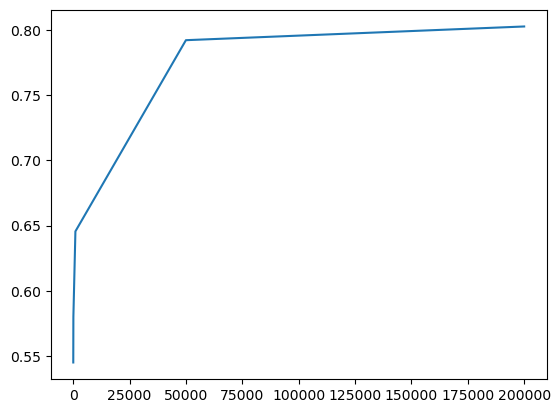

In [8]:
lists = sorted(scores_test.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()